# Explore-Explot Dilemma
The epsilon-greedy is simple, it uses a small number called epsiolon as a probability exploration. Typical values of epsilon are around 5% and 10%

Allows us to explore each arm an infinite number of times.

Problem: we get to a point where we explore when we don't need to

For epsilon=10% we will continue to spend 10% of the time doing suboptimal things.

Could do A/B test at some predetermined time, then set epsilon = 0 (Exists better ways to adapt)

Calculate the sample mean of a random variable?
It's the total sum divided by the number of samples

The problem with the equation, requires you to store all N elements in order to calculate the mean.

Solution = The mean at inth sample can be calculated from the mean at the N-1 sample
(Computationally eficient way)

Xn = 1/N*sum(N, i=1*Xi) = 1/N*sum(N-1, i=1*Xi) + 1/N*XN

## Important
#### Xn = (1-1/N)*XN-1 + 1/N*XN

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class Bandit:
    def __init__(self, m): #constructors takes m wich is the true mean.
        self.m = m
        self.mean = 0 #Estimate of the bandits mean.
        self.N = 0
        
    def pull(self): #simulates pulling the bandits arm
        return np.random.randn() + self.m
    
    def update(self, x): #x is the latest sample received from the bandit
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N * x #look at the equation Important    

In [25]:
def run_experiment(m1, m2, m3, eps, N): 
        """takes 3 different means m1,m2,m3. to compare three different bandits.
           takes an epsilon so we can do epsilon greedy
           and N = number of times we play
           When this function returns we want an array containing the cumulative average
           after every play
           We are going to compare the plots for different settings of epsilon
        """
        bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
        
        data = np.empty(N) #Array containing the results of size N
        
        for i in range(N):
            # epsilon greedy
            p = np.random.random() #Generate a random number between zero and one
            if p < eps:
                j = np.random.choice(3) #if p is less than epsilon we choose a bandit at random
            else:                       #otherwise we choose the bandit with the best current sample mean
                j = np.argmax([b.mean for b in bandits])
            x = bandits[j].pull() # we pull the chosen bandit
            bandits[j].update(x) # we update the bandit with the reward we just got
            
            #for the plot
            data[i] = x
        cumulative_average = np.cumsum(data) / (np.arange(N) + 1) #calculate the cumulative average
        
        #plot moving average ctr along with bars showing each of the means
        plt.plot(cumulative_average)
        plt.plot(np.ones(N)*m1)
        plt.plot(np.ones(N)*m2)
        plt.plot(np.ones(N)*m3)
        plt.xscale('log') #log scale so we can see the fluctuations in the earlier rounds
        plt.show()
        
        for b in bandits:
            print(b.mean) #print means just for debugging purposes
        
        return cumulative_average

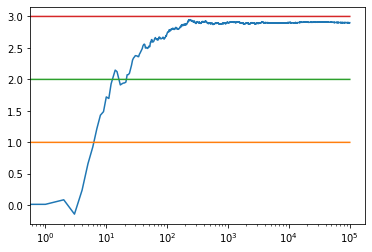

1.0234058610108792
2.010340995745051
2.9982828897252083


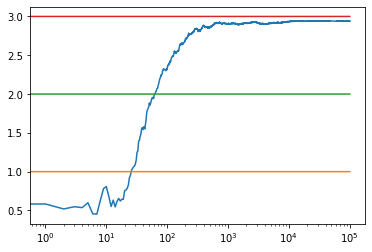

1.0230699969765875
1.9933301799360434
2.9895005317202568


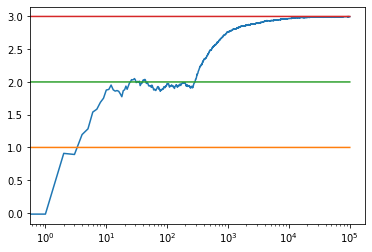

0.954003737992617
1.935545924499178
3.0088157527182453


/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


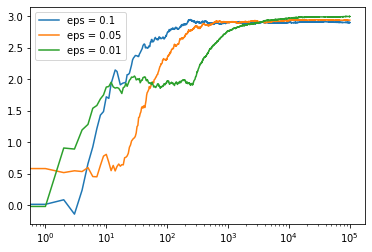

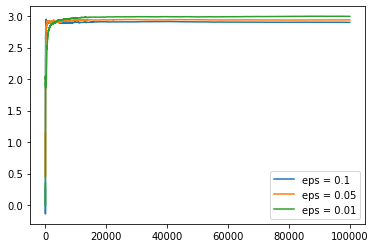

In [26]:
if __name__ == '__main__':
        c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
        c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
        c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)
        
        # log scale plot
        plt.plot(c_1, label="eps = 0.1")
        plt.plot(c_05, label="eps = 0.05")
        plt.plot(c_01, label="eps = 0.01")
        plt.legend()
        plt.xscale('log')
        plt.show()
        
        
        #linear plot
        plt.plot(c_1, label="eps = 0.1")
        plt.plot(c_05, label="eps = 0.05")
        plt.plot(c_01, label="eps = 0.01")
        plt.legend()
        plt.show()

# Optimistic Initial Values
Another simple way of solving the explore-exploit dilemma
Suppose the true mean of each bandit is << 10
Pick a high ceiling as the initial mean estimate
Initial sample mean is too good to be true
All collected data will cause it to go down
So if the mean is one as I collect more values the sample mean is going to converge to one in fact